In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

%matplotlib inline

## Lectura del CSV

In [3]:
data = pd.read_csv('data.csv')

data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


## Generación del análisis exploratorio

In [5]:
profile = ProfileReport(data, title="Exploración de datos")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Selección de variables numéricas, basándonos en la clasificación de cuantitativas y cualitativas

También reemplazamos todos los valores ? con un 0 para tener solo valores numéricos

In [6]:
numerical = data[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']]

for column in numerical:
    numerical[column] = numerical[column].replace('?', 0)

# question_mark_counts = numerical.apply(lambda x: (x == '?').sum())
# print(question_mark_counts)

numerical

/var/folders/nh/qxcg2qs54dq8v4tnbxqzpm7w0000gn/T/ipykernel_3339/1259706342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical[column] = numerical[column].replace('?', 0)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,34,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,8.0,0.0,0.0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.08,0.0,0.0,0,0,0
856,33,2.0,24.0,2.0,0.0,0.0,0.08,0.0,0.0,0,0,0


In [7]:
categorical = data[[col for col in data.columns if col not in numerical.columns]]

24

## Creación de matriz de correlación entre variables numéricas

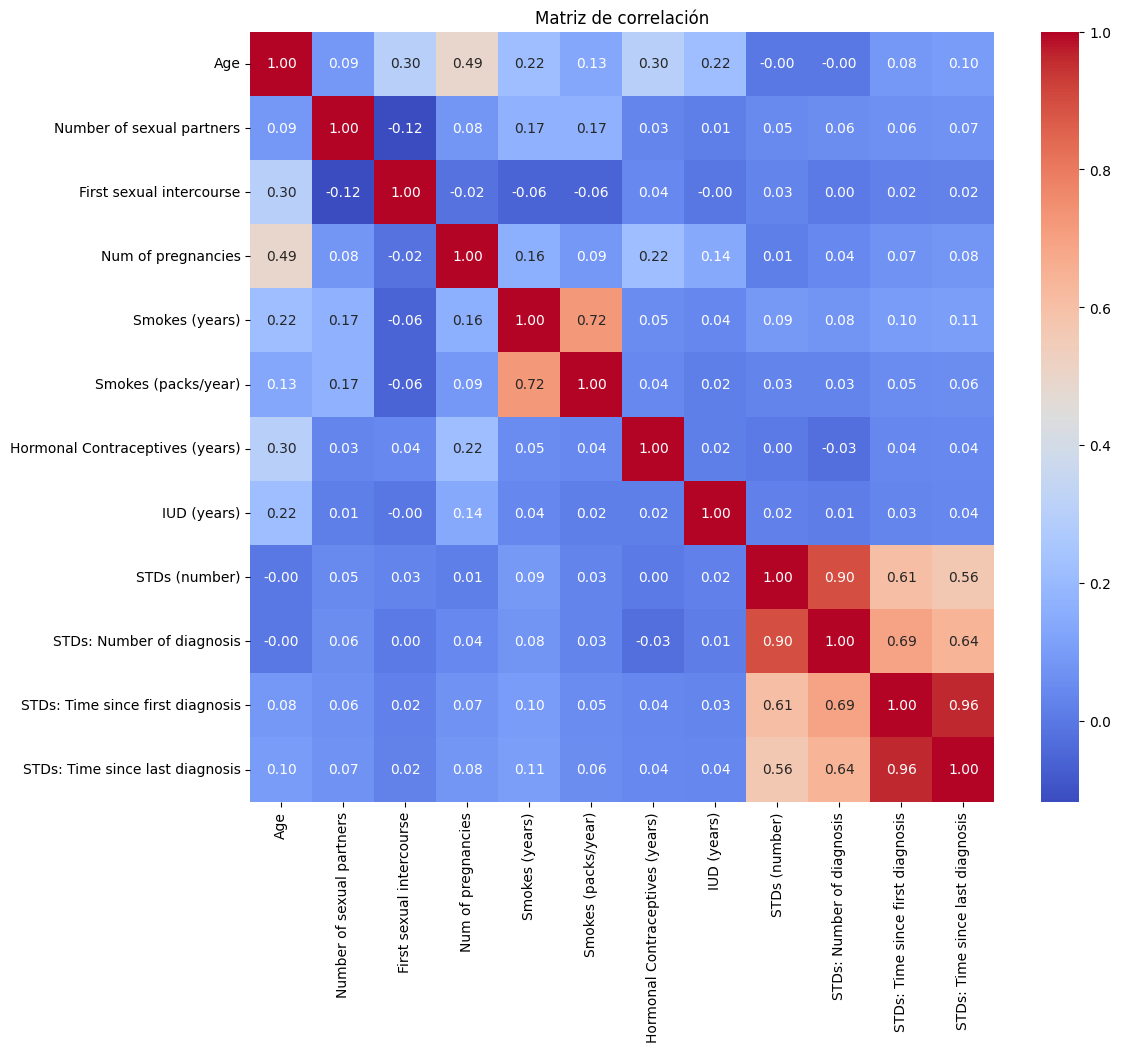

In [8]:
# Matriz de correlación
correlation_matrix = numerical.corr()
plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de correlación")
plt.show()

## Creación de las tablas de frecuencia para variables categóricas

In [9]:
import pandas as pd

def generar_tablas_frecuencia_con_estilo(data, columnas):
    styled_tables = {}
    for columna in columnas:
        frecuencia_univariada_norm = data[columna].value_counts(normalize=True).reset_index()
        frecuencia_univariada_norm.columns = [columna, 'Frequency']
        styled_table = frecuencia_univariada_norm.style.set_table_styles(
            [{
                'selector': 'th',
                'props': [
                    ('background-color', 'lightblue'),
                    ('color', 'black'),
                    ('font-family', 'verdana'),
                    ('border-style', 'solid'),
                    ('border-width', '1px'),
                    ('border-color', 'black')
                ]
            },
            {
                'selector': 'td',
                'props': [
                    ('background-color', 'lightyellow'),
                    ('color', 'black'),
                    ('font-family', 'verdana'),
                    ('border-style', 'solid'),
                    ('border-width', '1px'),
                    ('border-color', 'black')
                ]
            }]
        ).set_properties(**{
            'text-align': 'center'
        }).set_caption(f"Tabla de Frecuencia Normalizada - {columna}")

        styled_tables[columna] = styled_table
    return styled_tables

# Lista de columnas para las cuales quieres generar las tablas de frecuencia
columnas = [
    "Smokes", "Hormonal Contraceptives", "IUD", "STDs", "STDs:condylomatosis",
    "STDs:cervical condylomatosis", "STDs:vaginal condylomatosis",
    "STDs:vulvo-perineal condylomatosis", "STDs:syphilis",
    "STDs:pelvic inflammatory disease", "STDs:genital herpes",
    "STDs:molluscum contagiosum", "STDs:AIDS", "STDs:HIV", "STDs:Hepatitis B",
    "STDs:HPV", "Dx:Cancer", "Dx:CIN", "Dx:HPV", "Dx", "Hinselmann", "Schiller",
    "Citology", "Biopsy"
]

print(len(columnas))

# Generar y almacenar las tablas de frecuencia con estilo
tablas_estilizadas = generar_tablas_frecuencia_con_estilo(data, columnas)

for fields in tablas_estilizadas:
    display(tablas_estilizadas[fields])

24


,Smokes,Frequency
0,0.0,0.841492
1,1.0,0.143357
2,?,0.015152


,Hormonal Contraceptives,Frequency
0,1.0,0.560606
1,0.0,0.313520
2,?,0.125874


,IUD,Frequency
0,0.0,0.766900
1,?,0.136364
2,1.0,0.096737


,STDs,Frequency
0,0.0,0.785548
1,?,0.122378
2,1.0,0.092075


,STDs:condylomatosis,Frequency
0,0.0,0.826340
1,?,0.122378
2,1.0,0.051282


,STDs:cervical condylomatosis,Frequency
0,0.0,0.877622
1,?,0.122378


,STDs:vaginal condylomatosis,Frequency
0,0.0,0.872960
1,?,0.122378
2,1.0,0.004662


,STDs:vulvo-perineal condylomatosis,Frequency
0,0.0,0.827506
1,?,0.122378
2,1.0,0.050117


,STDs:syphilis,Frequency
0,0.0,0.856643
1,?,0.122378
2,1.0,0.020979


,STDs:pelvic inflammatory disease,Frequency
0,0.0,0.876457
1,?,0.122378
2,1.0,0.001166


,STDs:genital herpes,Frequency
0,0.0,0.876457
1,?,0.122378
2,1.0,0.001166


,STDs:molluscum contagiosum,Frequency
0,0.0,0.876457
1,?,0.122378
2,1.0,0.001166


,STDs:AIDS,Frequency
0,0.0,0.877622
1,?,0.122378


,STDs:HIV,Frequency
0,0.0,0.856643
1,?,0.122378
2,1.0,0.020979


,STDs:Hepatitis B,Frequency
0,0.0,0.876457
1,?,0.122378
2,1.0,0.001166


,STDs:HPV,Frequency
0,0.0,0.875291
1,?,0.122378
2,1.0,0.002331


,Dx:Cancer,Frequency
0,0,0.979021
1,1,0.020979


,Dx:CIN,Frequency
0,0,0.989510
1,1,0.010490


,Dx:HPV,Frequency
0,0,0.979021
1,1,0.020979


,Dx,Frequency
0,0,0.972028
1,1,0.027972


,Hinselmann,Frequency
0,0,0.959207
1,1,0.040793


,Schiller,Frequency
0,0,0.913753
1,1,0.086247


,Citology,Frequency
0,0,0.948718
1,1,0.051282


,Biopsy,Frequency
0,0,0.935897
1,1,0.064103
